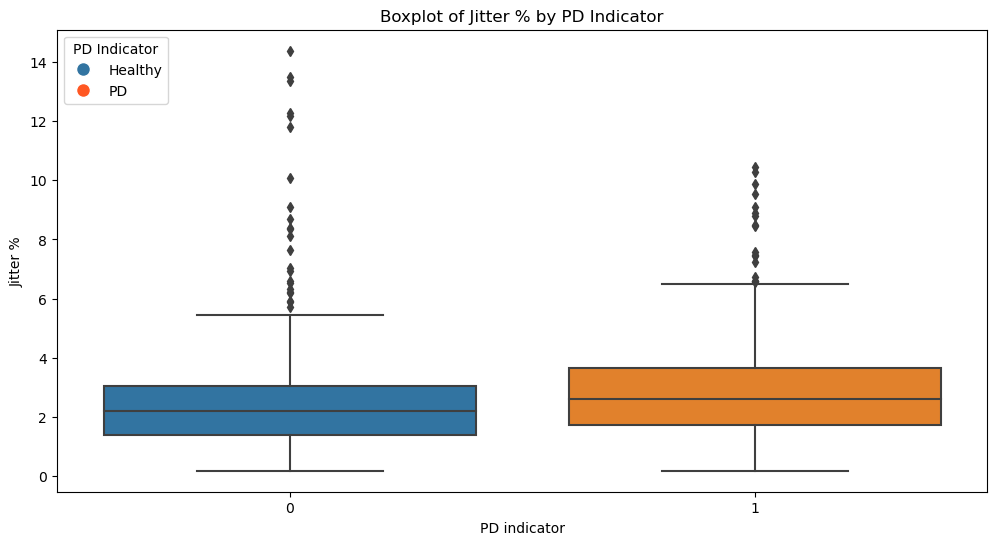

Variable: Jitter %
T-statistic: 3.179957964528876
P-value: 0.0015166306694224796
Effect Size (Cohen's d): 0.19749570610619419
-----------------------------


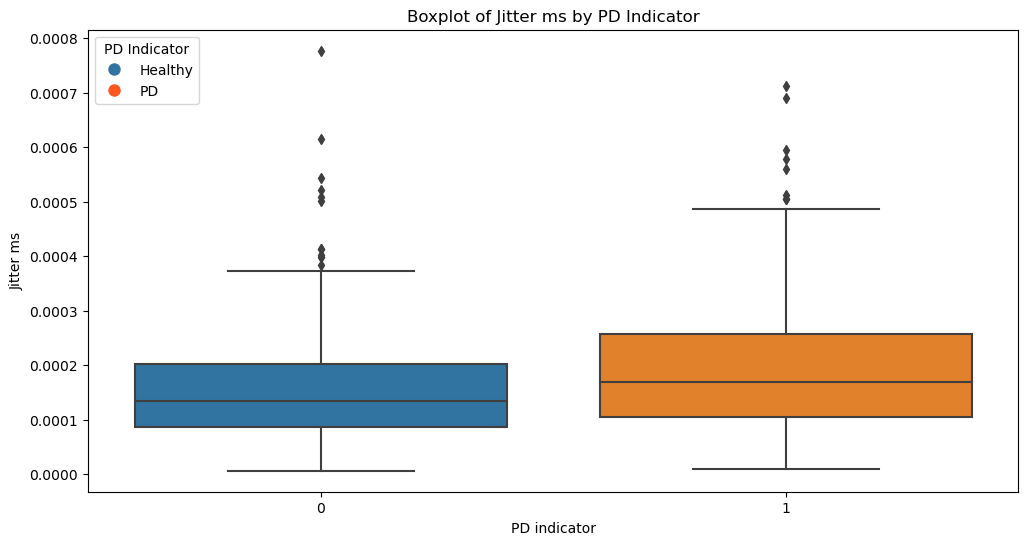

Variable: Jitter ms
T-statistic: 5.483006945218922
P-value: 5.2517055998338165e-08
Effect Size (Cohen's d): 0.3413358145709124
-----------------------------


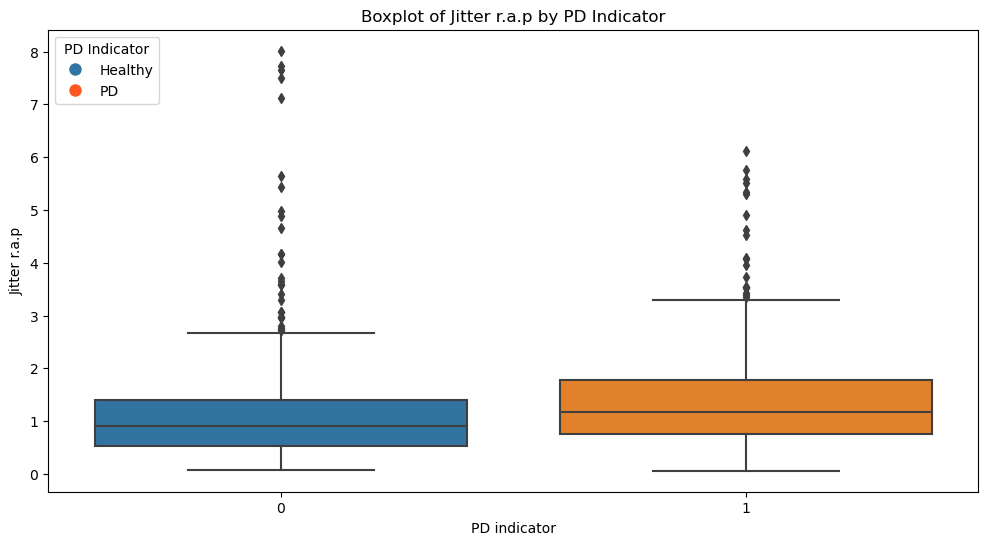

Variable: Jitter r.a.p
T-statistic: 3.6145918292716948
P-value: 0.00031527323464814
Effect Size (Cohen's d): 0.22463895154286892
-----------------------------


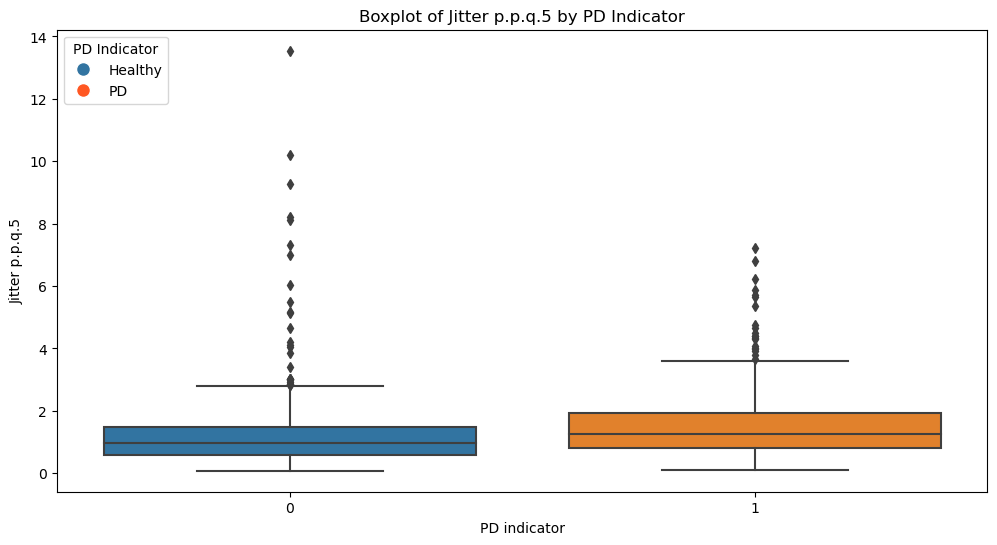

Variable: Jitter p.p.q.5
T-statistic: 3.612105844249591
P-value: 0.0003182736430724779
Effect Size (Cohen's d): 0.22515723367729856
-----------------------------


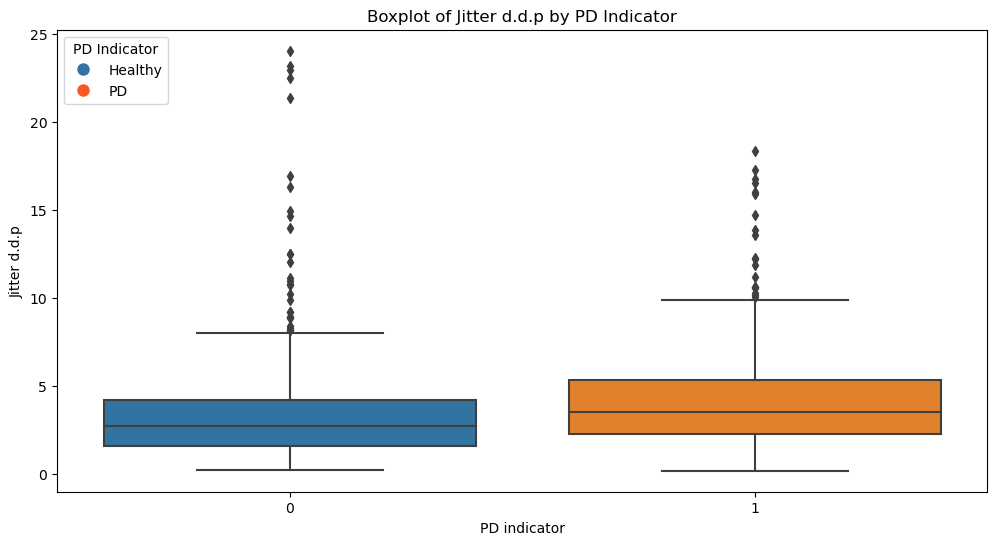

Variable: Jitter d.d.p
T-statistic: 3.614413628944979
P-value: 0.00031548742446012713
Effect Size (Cohen's d): 0.22462793878684445
-----------------------------


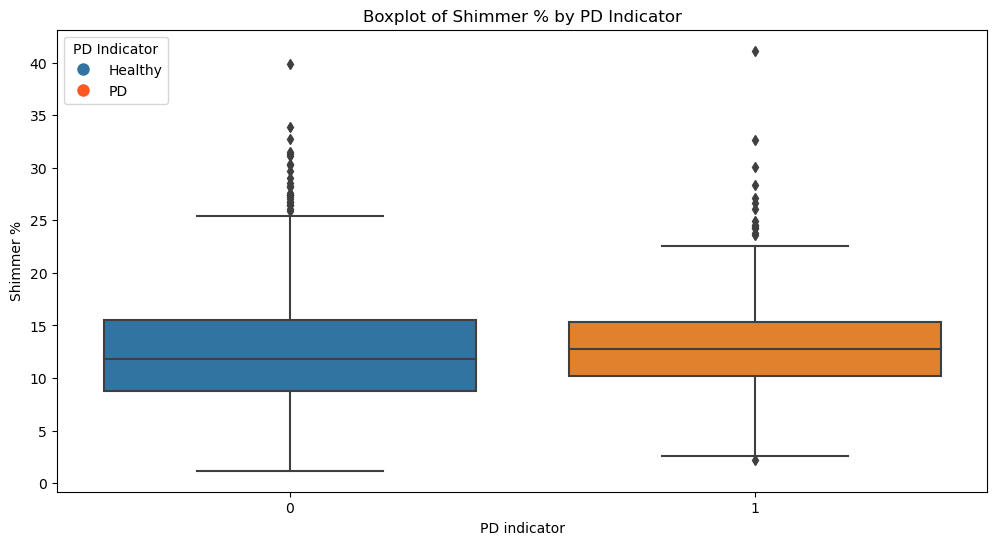

Variable: Shimmer %
T-statistic: 0.3181733112700877
P-value: 0.7504175388743878
Effect Size (Cohen's d): 0.019908360569733437
-----------------------------


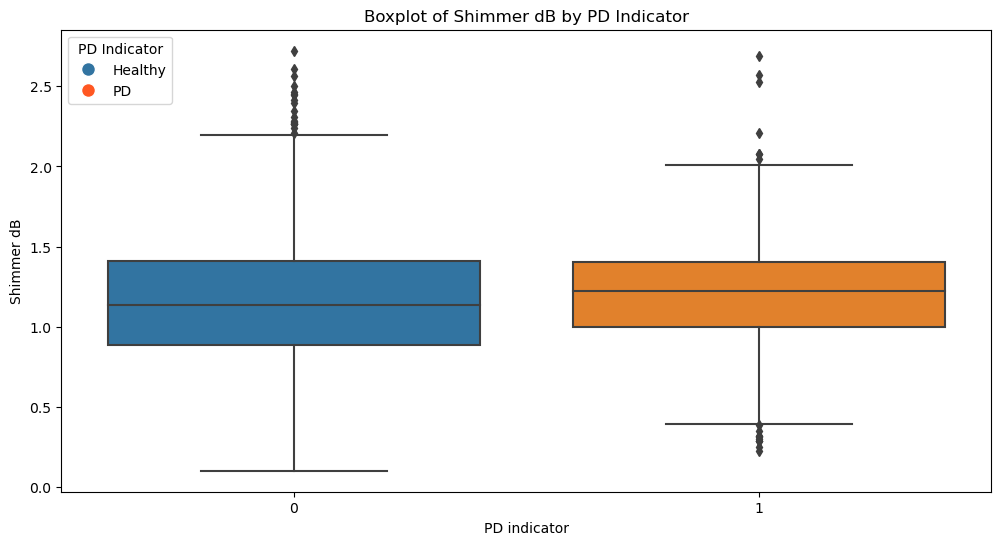

Variable: Shimmer dB
T-statistic: 0.9075226884388011
P-value: 0.36434129477650257
Effect Size (Cohen's d): 0.05674335541877624
-----------------------------


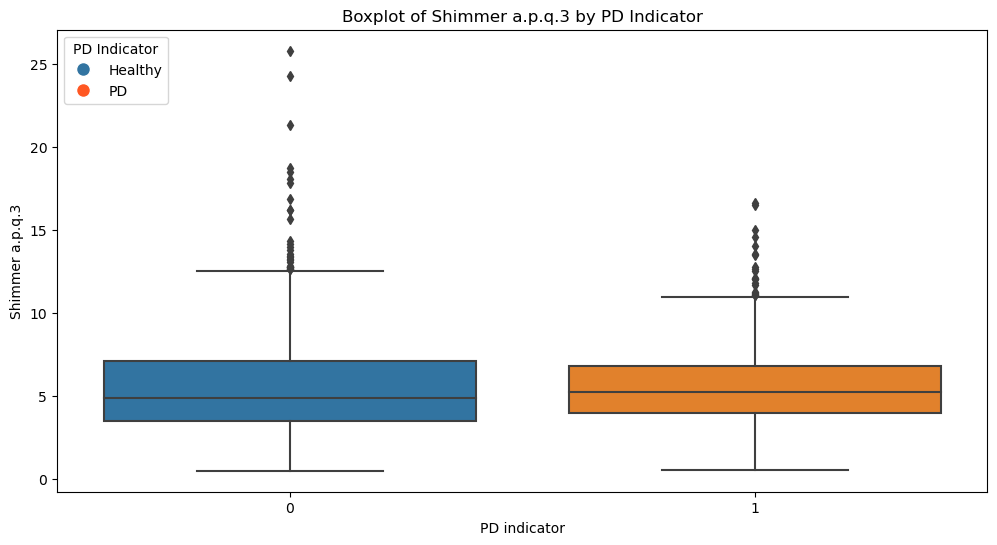

Variable: Shimmer a.p.q.3
T-statistic: -0.5729283921523461
P-value: 0.5668173829668095
Effect Size (Cohen's d): -0.03603311429646302
-----------------------------


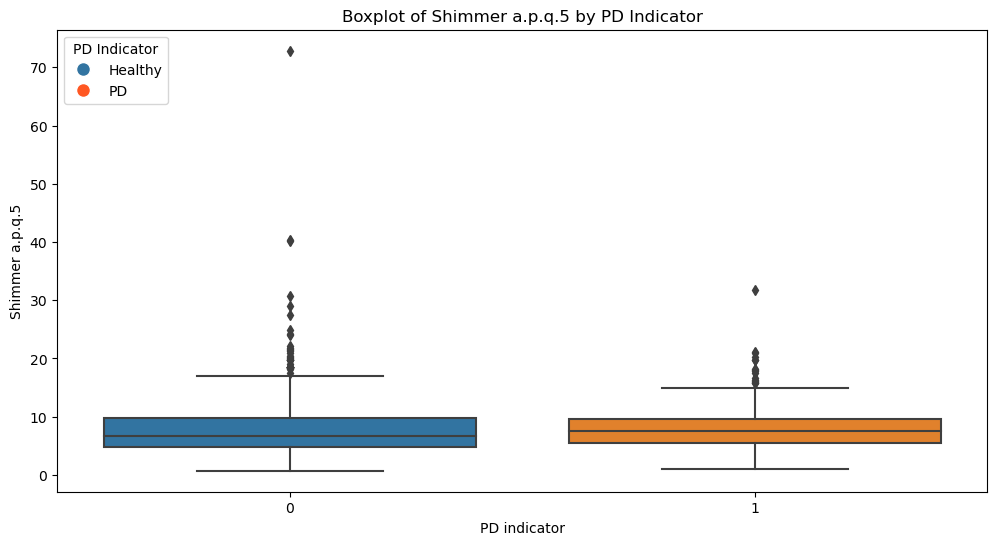

Variable: Shimmer a.p.q.5
T-statistic: -0.7062277064892245
P-value: 0.4802051759460255
Effect Size (Cohen's d): -0.04519560288694937
-----------------------------


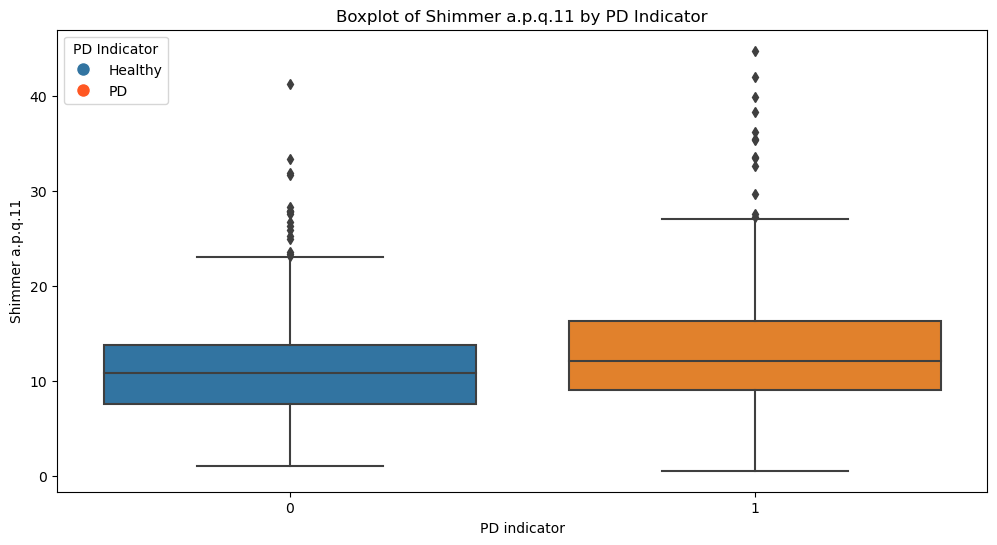

Variable: Shimmer a.p.q.11
T-statistic: 4.796424500273657
P-value: 1.851520847140766e-06
Effect Size (Cohen's d): 0.2982156968929628
-----------------------------


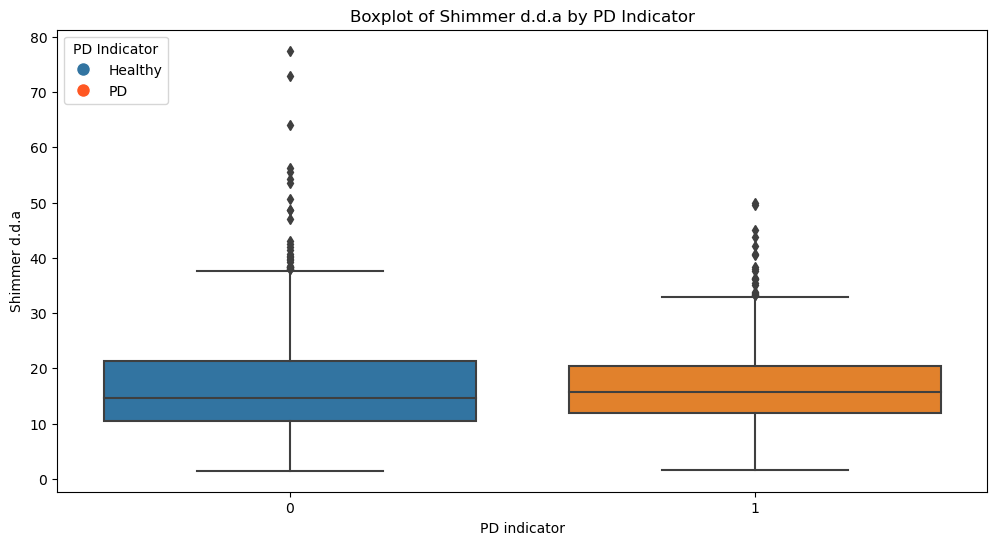

Variable: Shimmer d.d.a
T-statistic: -0.5729780279081053
P-value: 0.5667837868983056
Effect Size (Cohen's d): -0.03603623682169019
-----------------------------


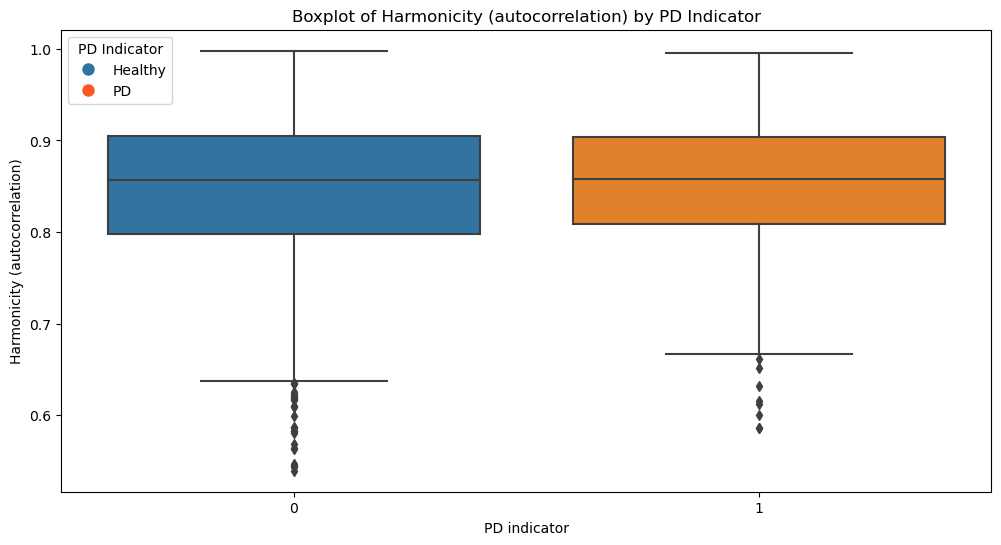

Variable: Harmonicity (autocorrelation)
T-statistic: 2.600068541006031
P-value: 0.009453025535708369
Effect Size (Cohen's d): 0.1626545127066276
-----------------------------


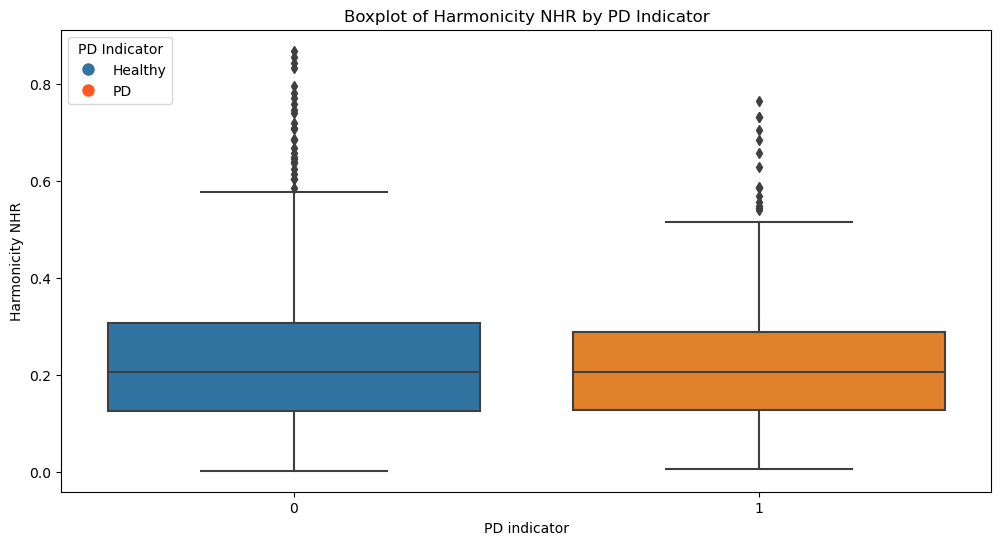

Variable: Harmonicity NHR
T-statistic: -2.4356026429379405
P-value: 0.015034614259724334
Effect Size (Cohen's d): -0.15234613262614927
-----------------------------


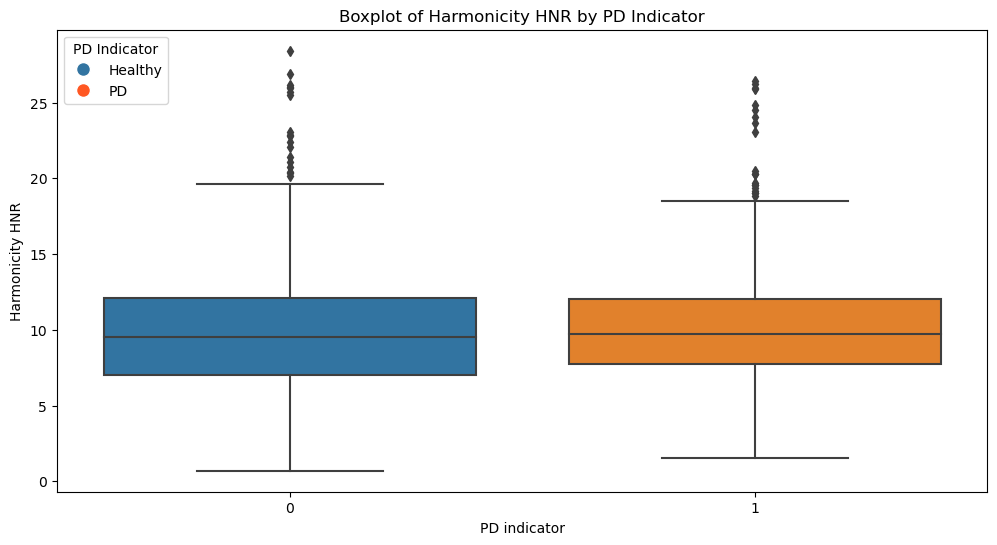

Variable: Harmonicity HNR
T-statistic: 1.297973260614607
P-value: 0.19458514112654204
Effect Size (Cohen's d): 0.08085524625209654
-----------------------------


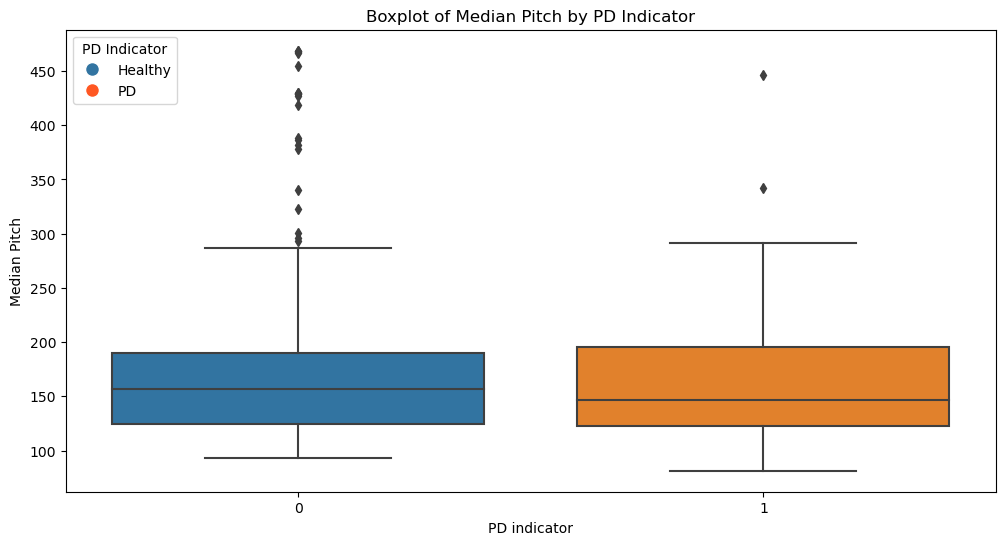

Variable: Median Pitch
T-statistic: -2.724924363612065
P-value: 0.006539846963928816
Effect Size (Cohen's d): -0.17102070290191837
-----------------------------


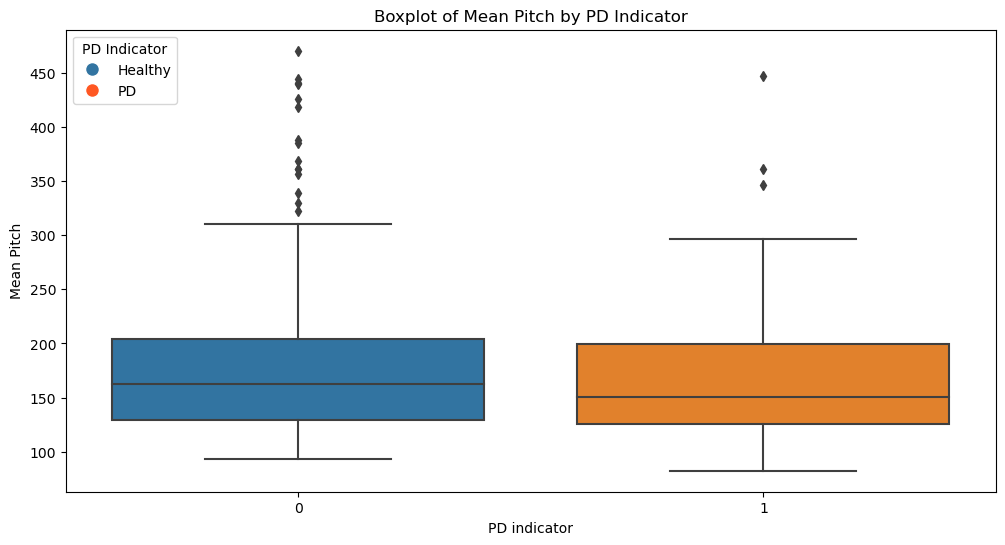

Variable: Mean Pitch
T-statistic: -3.34285038933219
P-value: 0.000858858990037699
Effect Size (Cohen's d): -0.20887579987116167
-----------------------------


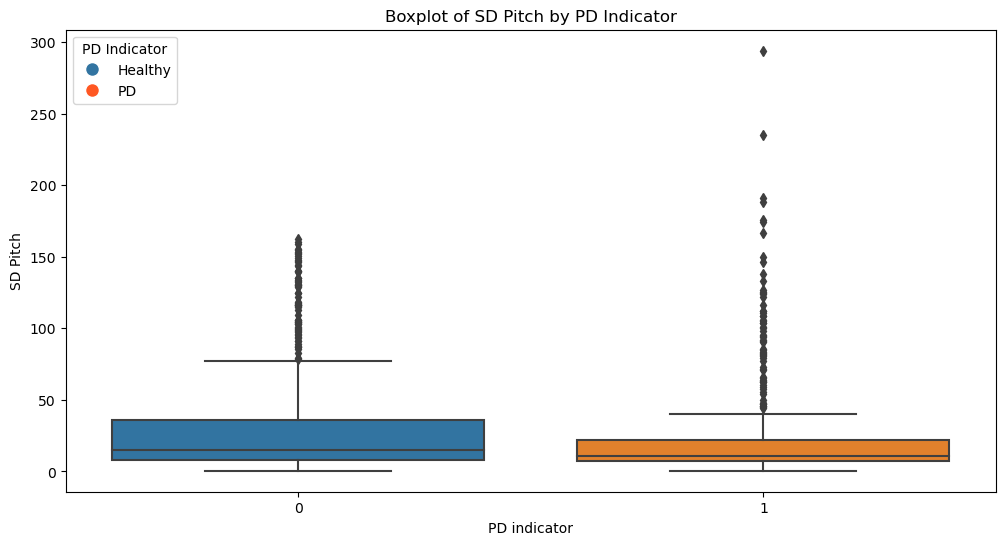

Variable: SD Pitch
T-statistic: -3.915311025321047
P-value: 9.618599277227428e-05
Effect Size (Cohen's d): -0.24332346182382197
-----------------------------


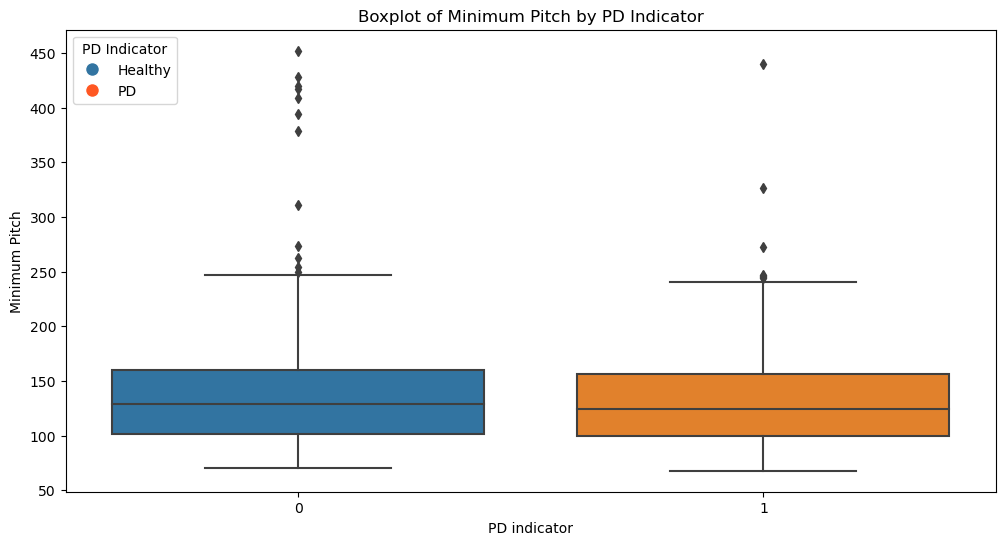

Variable: Minimum Pitch
T-statistic: -1.9126626178106443
P-value: 0.056066489835387645
Effect Size (Cohen's d): -0.11909969453263428
-----------------------------


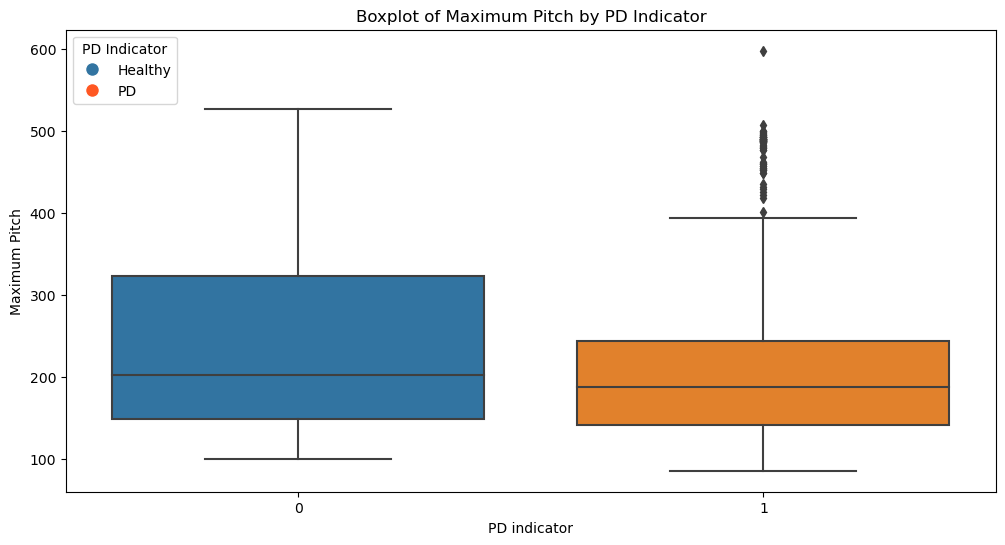

Variable: Maximum Pitch
T-statistic: -4.523360620992199
P-value: 6.788944027612663e-06
Effect Size (Cohen's d): -0.28176107555957014
-----------------------------


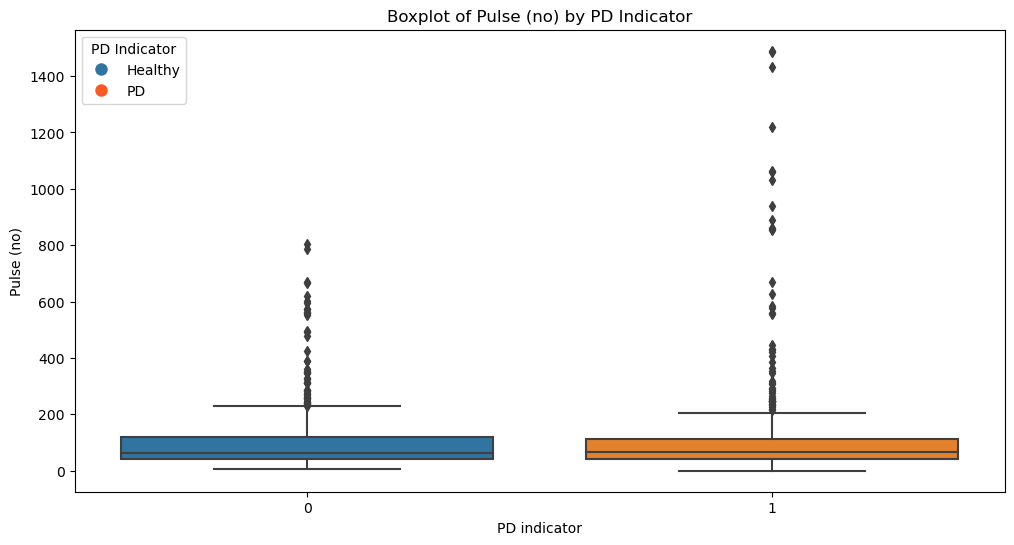

Variable: Pulse (no)
T-statistic: 1.3129241180569509
P-value: 0.1894989816058314
Effect Size (Cohen's d): 0.08337622171753703
-----------------------------


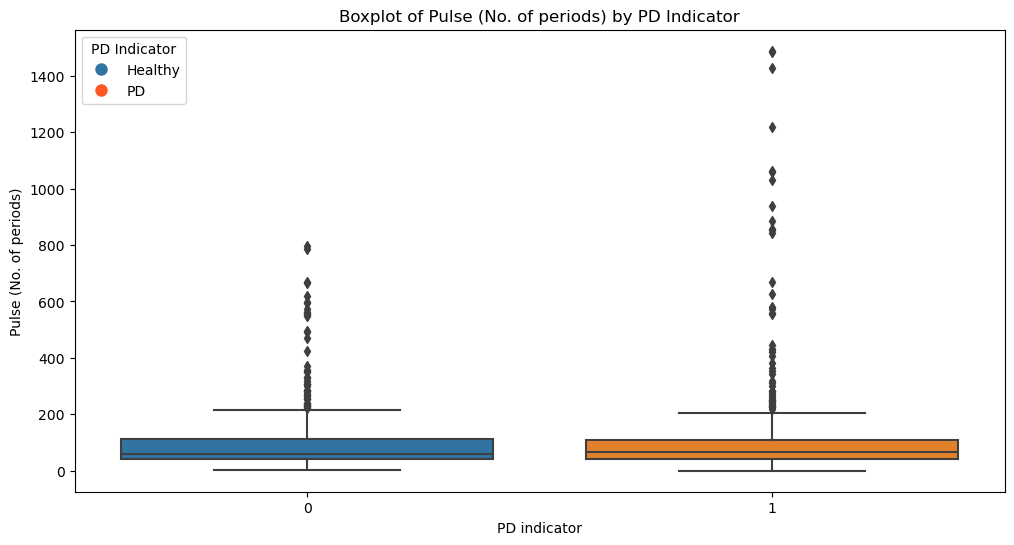

Variable: Pulse (No. of periods)
T-statistic: 1.5082980320999853
P-value: 0.13178285371818496
Effect Size (Cohen's d): 0.09589765387470596
-----------------------------


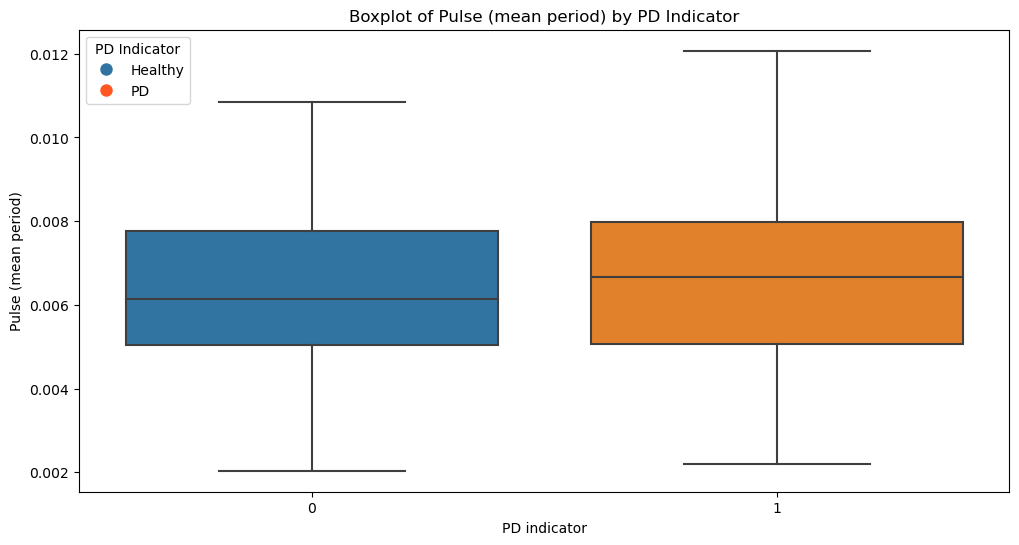

Variable: Pulse (mean period)
T-statistic: 2.6512240355078025
P-value: 0.008142328983202567
Effect Size (Cohen's d): 0.1645012620120285
-----------------------------


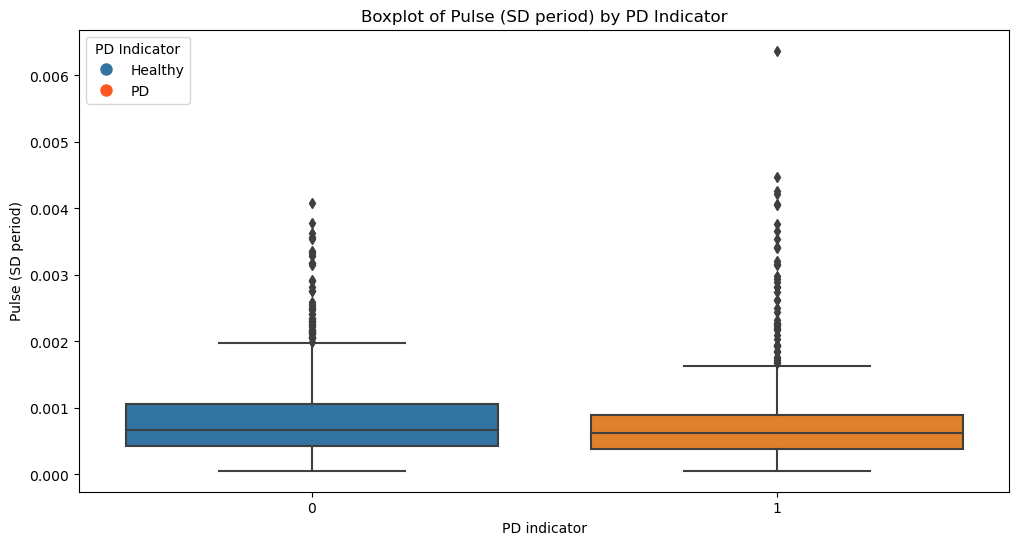

Variable: Pulse (SD period)
T-statistic: -1.8792403620913751
P-value: 0.06049193833886398
Effect Size (Cohen's d): -0.11662353244128934
-----------------------------


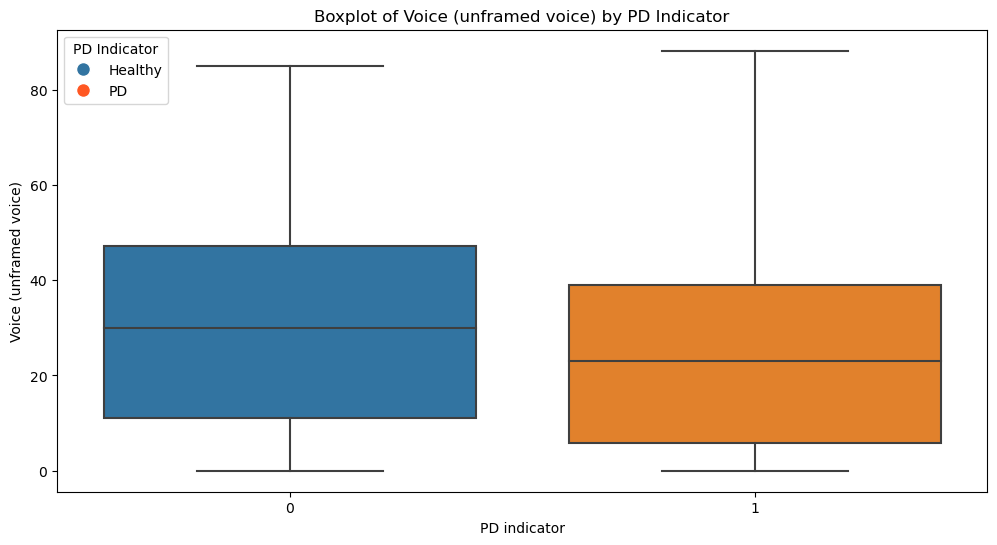

Variable: Voice (unframed voice)
T-statistic: -3.9231227451992123
P-value: 9.316306562828443e-05
Effect Size (Cohen's d): -0.24342906950967108
-----------------------------


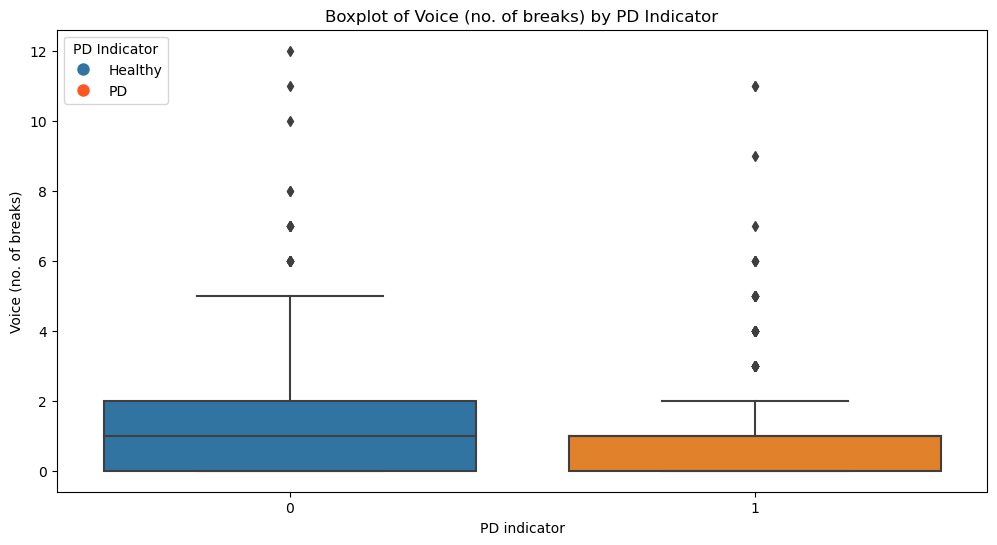

Variable: Voice (no. of breaks)
T-statistic: -2.5588411604941084
P-value: 0.010643202989291525
Effect Size (Cohen's d): -0.15933974536795842
-----------------------------


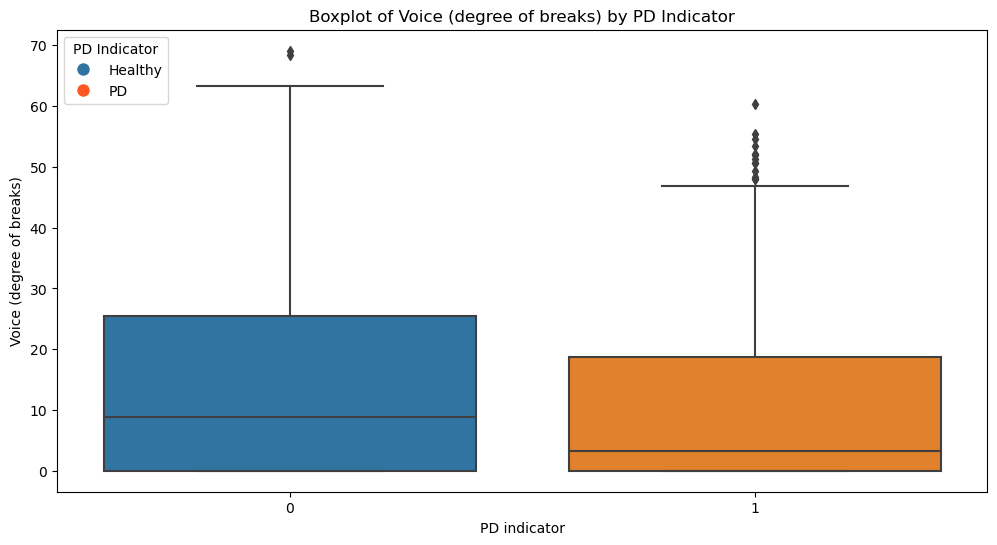

Variable: Voice (degree of breaks)
T-statistic: -4.07249380583184
P-value: 5.005424071729825e-05
Effect Size (Cohen's d): -0.2535575331592663
-----------------------------


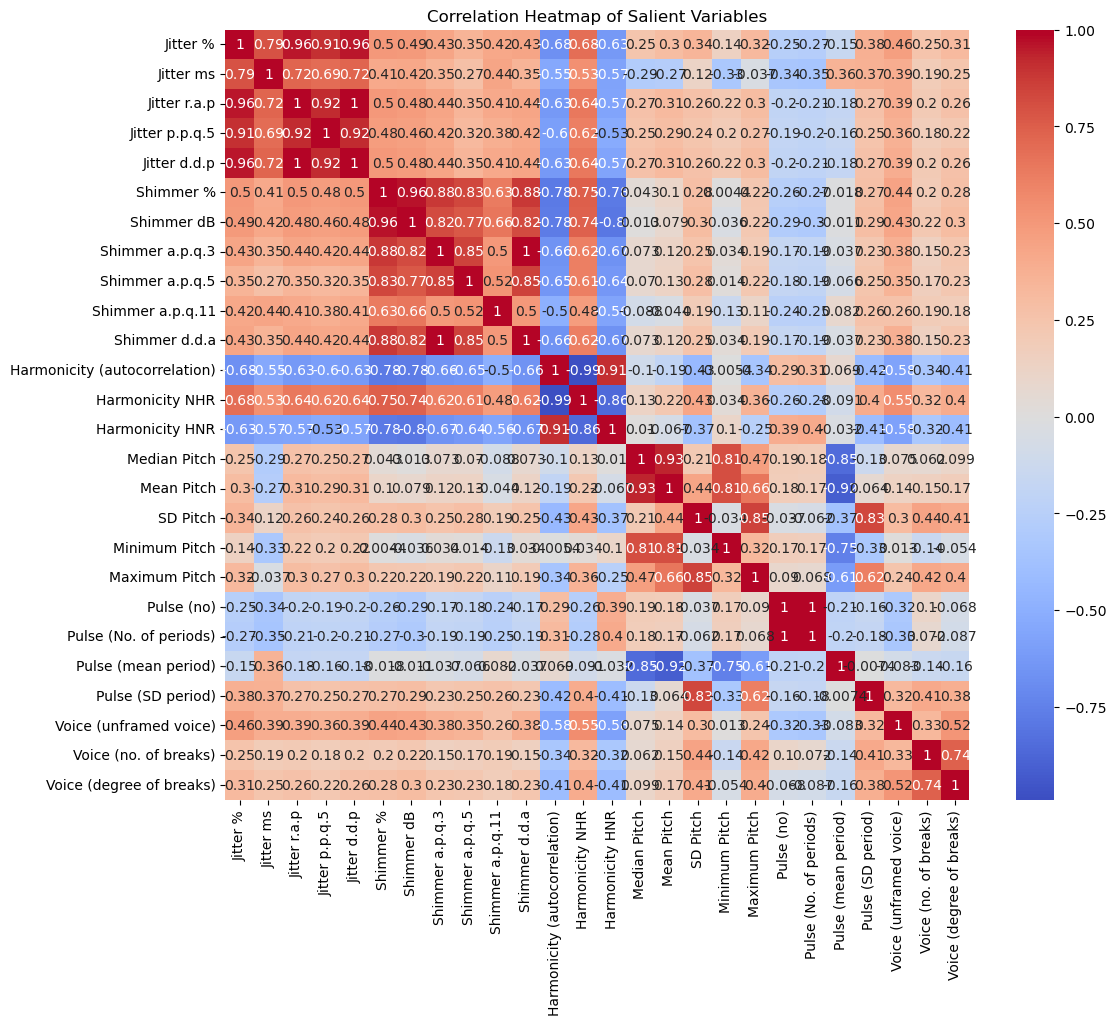

In [27]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset into a DataFrame 
data = pd.read_csv('../po1_data.txt')

data.columns = ['Subject identifier', 'Jitter %', 'Jitter ms', 'Jitter r.a.p', 'Jitter p.p.q.5', 'Jitter d.d.p',
             'Shimmer %', 'Shimmer dB', 'Shimmer a.p.q.3', 'Shimmer a.p.q.5', 'Shimmer a.p.q.11', 'Shimmer d.d.a',
             'Harmonicity (autocorrelation)', 'Harmonicity NHR', 'Harmonicity HNR', 'Median Pitch', 'Mean Pitch', 
              'SD Pitch', 'Minimum Pitch', 'Maximum Pitch', 'Pulse (no)', 'Pulse (No. of periods)', 
              'Pulse (mean period)', 'Pulse (SD period)', 'Voice (unframed voice)', 'Voice (no. of breaks)', 
             'Voice (degree of breaks)', 'UPDRS', 'PD indicator']

# List of variables of interest
salientVariables = [
    'Jitter %', 'Jitter ms', 'Jitter r.a.p', 'Jitter p.p.q.5', 'Jitter d.d.p',
    'Shimmer %', 'Shimmer dB', 'Shimmer a.p.q.3', 'Shimmer a.p.q.5', 'Shimmer a.p.q.11', 'Shimmer d.d.a',
    'Harmonicity (autocorrelation)', 'Harmonicity NHR', 'Harmonicity HNR', 'Median Pitch', 'Mean Pitch',
    'SD Pitch', 'Minimum Pitch', 'Maximum Pitch', 'Pulse (no)', 'Pulse (No. of periods)',
    'Pulse (mean period)', 'Pulse (SD period)', 'Voice (unframed voice)', 'Voice (no. of breaks)',
    'Voice (degree of breaks)'
]

# Iterate through each variable
for variable in salientVariables:
    # Create a custom legend inside the loop
    cmap = sns.color_palette(["#3274a1", "#FF5722"])  # Green for healthy, Orange for PD
    legend_labels = {0: 'Healthy', 1: 'PD'}
    
    # Separate data into Parkinson's Disease (PD) and healthy groups
    pdGroup = data[data['PD indicator'] == 1]
    healthyGroup = data[data['PD indicator'] == 0]

    # Descriptive statistics for PD group
    pdSummary = pdGroup.groupby('Subject identifier')[variable].describe()
    
    # Descriptive statistics for healthy group
    healthySummary = healthyGroup.groupby('Subject identifier')[variable].describe()

    # Visualize data distribution using a boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='PD indicator', y=variable)
    plt.title(f'Boxplot of {variable} by PD Indicator')
    
     # Create a legend axis and add the legend to it
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap[i], markersize=10, label=legend_labels[i]) for i in range(2)]
    common_legend = plt.legend(handles=legend_handles, title="PD Indicator", loc='upper left')
    plt.show()

    # Perform a t-test for means comparison
    t_statistic, p_value = stats.ttest_ind(pdGroup[variable], healthyGroup[variable])
    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Calculate Cohen's d effect size
    pdMean = pdGroup[variable].mean()
    healthyMean = healthyGroup[variable].mean()
    pdStd = pdGroup[variable].std()
    healthyStd = healthyGroup[variable].std()
    effectSize = (pdMean - healthyMean) / ((pdStd + healthyStd) / 2)
    print(f"Effect Size (Cohen's d): {effectSize}")
    print("-----------------------------")

# Select relevant columns for correlation analysis
selectedData = data[salientVariables]

# Calculate correlation matrix
correlationMatrix = selectedData.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Salient Variables")
plt.show()